#### 1-import libs 

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2- read dataset 

In [49]:
dataset = pd.read_csv('../data/spam.csv',delimiter=',',encoding='latin-1')


### 3- explore the dataset

In [50]:
dataset.head(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


In [51]:
dataset.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [52]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [53]:
dataset.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [54]:
dataset.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [55]:
dataset.duplicated().sum()

403

### 4- data preprocessing

In [56]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [57]:
### drop columns which contains null values more than %50
null_columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4']
dataset = dataset.drop(null_columns,axis=1)


dataset.drop()

In [58]:
dataset.sample()

,v1,v2
4155,ham,"Yo, call me when you get the chance, a friend ..."


In [59]:
# drop duplicate rows 
dataset = dataset.drop_duplicates()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5169 non-null   object
 1   v2      5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


In [60]:
## change columns names v1 to target and v2 to msg 
dataset.rename(columns = {'v1':'target','v2':'msg'},inplace=True)

In [61]:
dataset.sample()

,target,msg
2218,ham,Nice talking to you! please dont forget my pix...


In [62]:
dataset.to_csv('../data/preprocessed_dataset.csv',index = False)

#### Data Visualization

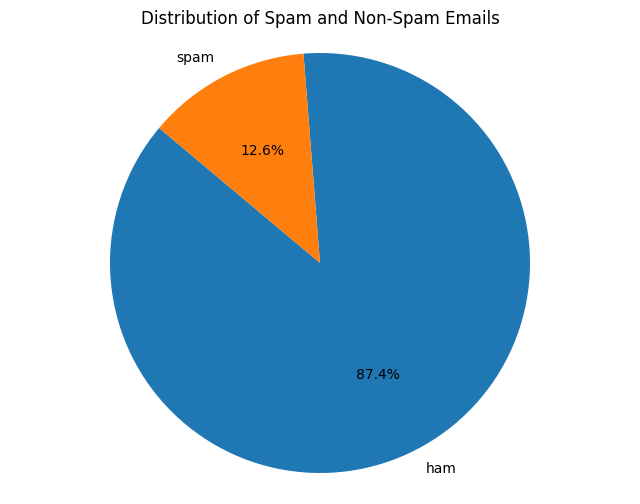

In [63]:
MSG_TYPE = dataset['target'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(MSG_TYPE, labels=MSG_TYPE.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Spam and Non-Spam Emails')
plt.axis('equal') 
plt.show()

In [64]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [65]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KMR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
ps = PorterStemmer()

def msg_preprocessing(msg):
    msg = msg.lower()
    msg = re.sub('[^a-zA-Z ]', '', msg)
    msg = msg.split()
    words_of_msg = [ps.stem(word) for word in msg if word not in set(stopwords.words('english'))]
    preprocessed_msag = ' '.join(words_of_msg)
    return preprocessed_msag

dataset['msg'] = dataset['msg'].apply(msg_preprocessing)

In [ ]:
dataset.head()

,target,msg
0,ham,go jurong point crazi avail bugi n great world...
1,ham,ok lar joke wif u oni
2,spam,free entri wkli comp win fa cup final tkt st m...
3,ham,u dun say earli hor u c alreadi say
4,ham,nah dont think goe usf live around though
